In [2]:
import SimpleITK as sitk
import matplotlib.pylab as plt
import numpy as np
import pydicom as dicom
import pylidc as pl
import cv2

In [3]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5)
print(anns.count())

691


In [4]:
print(anns[9].scan.patient_id)
ann = anns[0]

LIDC-IDRI-0154


In [5]:
anns[0].print_formatted_feature_table()

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid/Round              | 4 
Margin             | Near Poorly Defined      | 2 
Lobulation         | Near Marked Lobulation   | 4 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


In [8]:
# CALCULA O NUMERO DE NODULOS DO PACIENTE


pid = 'LIDC-IDRI-0499'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=505,patient_id=LIDC-IDRI-0499) has 7 nodules.
Nodule 1 has 2 annotations.
Nodule 2 has 2 annotations.
Nodule 3 has 2 annotations.
Nodule 4 has 2 annotations.
Nodule 5 has 2 annotations.
Nodule 6 has 2 annotations.
Nodule 7 has 1 annotations.


In [72]:
anns = pl.query(pl.Annotation)\
        .filter(pl.Annotation.spiculation > 3)

print(anns[4])
anns.count()

Annotation(id=15,scan_id=2)


522

In [78]:
ann = anns[24]
vol = ann.scan.to_volume()

Loading dicom files ... This may take a moment.


In [79]:
print(ann.bbox())

(slice(310, 326, None), slice(147, 171, None), slice(103, 108, None))


In [70]:
img = vol[ann.bbox()][:,:,2]

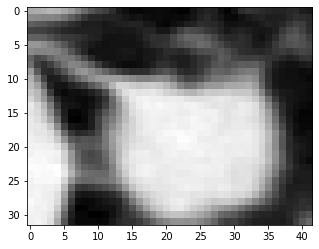

In [51]:
plt.imshow(img,cmap='gray')

Loading dicom files ... This may take a moment.


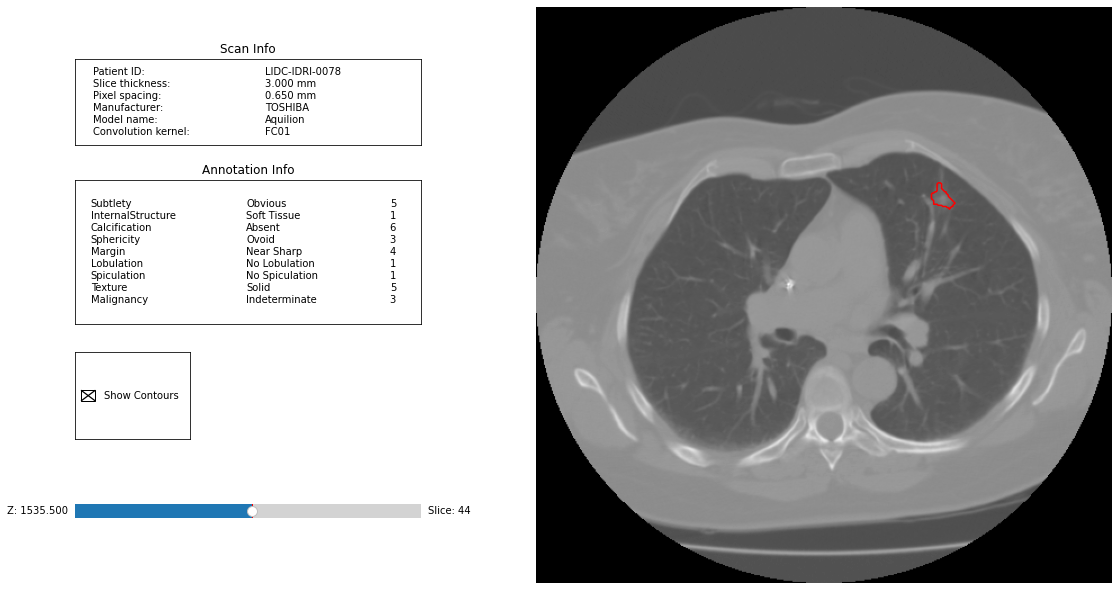

In [84]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy==3)
ann[0].visualize_in_scan()